<a href="https://colab.research.google.com/github/Koscee/pytorch-deep-learning-practice/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

Types:

| Problem type | What it is? | Example |
|---|---|---|
| Binary Classification | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| Multi-class Classification | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| Multi-label Classification | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |

## 1. Generate classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make a DataFrame of circle data
import pandas as pd

circles_df = pd.DataFrame({"X1": X[:, 0],
                           "X2": X[:, 1],
                           "Label": y})
circles_df

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


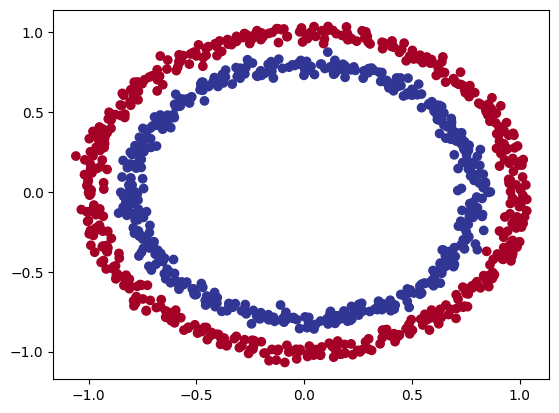

In [6]:
# Visualize sample dataset
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap="RdYlBu")

**Note:** The above sample data is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

## 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#  View the first sample's features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and its label y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and its label y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and its label y: 1
Shape for one sample of X: (2,) and its label y: ()


## 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch

torch.__version__

'2.1.0+cu121'

In [10]:
(type(X), X.dtype), (type(y), y.dtype)

((numpy.ndarray, dtype('float64')), (numpy.ndarray, dtype('int64')))

In [11]:
# Convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
(type(X), X.dtype), (type(y), y.dtype)

((torch.Tensor, torch.float32), (torch.Tensor, torch.float32))

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test data, 80% train data
                                                    random_state=42)

In [14]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Build a model to classify our blue and red dots.

Steps:
1. Setup device agnostic code (so the code can run on a GPU if there is one)
2. Construct a model (by inheriting the `nn.Module` class)
3. Define a loss function and optimizer
4. Create a training and test loop

In [16]:
from torch import nn

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
# 1. Create a model that inherits / extends nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers
      # takes in 2 features and scales up to 5 fetaures
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
      # takes in 5 features from previous layer and outputs a single feature (i.e the label y)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Define a forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [19]:
# Replicate model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6035, -0.2226],
                      [-0.5311, -0.4221],
                      [ 0.4535,  0.2414],
                      [-0.4972, -0.1174],
                      [ 0.2270, -0.5302]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6963,  0.0526, -0.1683, -0.5182,  0.1013], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1856, -0.2453,  0.3953,  0.3022,  0.0638]], device='cuda:0')),
             ('1.bias', tensor([-0.3308], device='cuda:0'))])

In [21]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds.squeeze())}, Shape: {untrained_preds.squeeze().shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds.squeeze()[:10]}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
 tensor([-0.4781, -0.3420, -0.6598, -0.4274, -0.3818, -0.3009, -0.1380, -0.1277,
        -0.6712, -0.3298], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Choosing a loss function or optimizer depends on the problem you are solving.

For example:
* Regression: MAE or MSE (mean absolute error or mean squared error) is used.
* Classification: binary cross entropy or categorical cross entropy (cross entropy) is used.

As a reminder, the loss function measures how wrong your predictions are.

List of common loss functions and optimizers:

| Loss function/Optimizer | Problem type | PyTorch Code |
|---|---|---|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | `torch.optim.SGD()` |
| Adam optimizer | Classification, regression, many others. | `torch.optim.Adam()` |
| Binary cross entropy loss | Binary classification | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss` |
| Cross entropy loss | Multi-class classification | `torch.nn.CrossEntropyLoss` |
| Mean absolute error (MAE) or L1 Loss | Regression | `torch.nn.L1Loss` |
| Mean squared error (MSE) or L2 Loss | Regression | `torch.nn.MSELoss` |


For this classification problem, `torch.nn.BCEWithLogitsLoss()` will be used.

More on binary cross entropy (BCE) -> https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [22]:
# Setup the loss function

# loss_fn = nn.BCELoss # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss

# BCEWithLogitsLoss has sigmoid activation function built-in.
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = Sigmoid layer + BCELoss

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
# Calculate accuracy : out of 100 samples, what % does our model get right?
# total_correct_guesses / total samples * 100
def accuracy_fn(y_true, y_pred):
  total_correct_guesses = torch.eq(y_true, y_pred).sum().item()
  accuracy = (total_correct_guesses/ len(y_pred)) * 100
  return accuracy


## 3. Train model

Build the training loop steps:
1. **Forward pass** - `model(X_train)`
2. **Calculate the loss** - `loss = loss_fn(y_pred, y_train)`
3. **Zero gradients** - `optimizer.zero_grad()`
4. **Perform backpropagation on the loss** - `loss.backward`
5. **Step the optimizer (gradient descent)** - `optimizer.step()`

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

**Logits** are model's raw outputs that havn't been passed through any activation function.

**Logits** can be converted into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Model's prediction probabilities can be converted to **prediction labels** by either rounding them or taking the `argmax()`.

In [24]:
# View first 5 outputs (raw outputs) of the forward pass on test data.
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.4781],
        [-0.3420],
        [-0.6598],
        [-0.4274],
        [-0.3818]], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# Use the sigmoid activation function on the model's logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3827],
        [0.4153],
        [0.3408],
        [0.3948],
        [0.4057]], device='cuda:0')

**Decision boundary**

For the prediction probability values, a range-style rounding needs to be performed on them:
* `y_pred_probs` < 0.5,  y =  0 (class 0)
* `y_pred_probs` >= 0.5,  y = 1  (class 1)

In [27]:
# Note: don't round the raw logits above directly, raw logits need to pass through the activation function
# which returns the prediction probability that is been rounded.
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [28]:
# Find the predicted labels

model_0.eval()
with torch.inference_mode():
  # method 1
  y_pred_labels_v0 = torch.round(y_pred_probs)

  # method 2: in one line (logits -> pred probs -> pred labels)
  y_pred_labels_v1 = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check y_pred_label v0 and v1 are equal
print(torch.eq(y_pred_labels_v0.squeeze(), y_pred_labels_v1.squeeze()))

# Get rid of extra dimension
y_pred_labels_v0.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_train_logits = model_0(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate train loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)

  train_loss = loss_fn(y_train_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                         y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_train_pred)

  # 3. Optimizeer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step (update parameters to reduce the gradient)
  optimizer.step()


  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_logits = model_0(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. Calculate the test loss / accuracy
    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=y_test_pred)

  # Print out details of the process
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}  | Train loss: {train_loss:.5f}, Train Acc: {train_accuracy:.2f}%  | Test loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}%")


Epoch: 0  | Train loss: 0.71963, Train Acc: 50.00%  | Test loss: 0.72262, Test Acc: 50.00%
Epoch: 10  | Train loss: 0.70561, Train Acc: 42.38%  | Test loss: 0.70986, Test Acc: 40.50%
Epoch: 20  | Train loss: 0.70028, Train Acc: 47.88%  | Test loss: 0.70468, Test Acc: 44.00%
Epoch: 30  | Train loss: 0.69791, Train Acc: 47.88%  | Test loss: 0.70211, Test Acc: 50.00%
Epoch: 40  | Train loss: 0.69665, Train Acc: 48.00%  | Test loss: 0.70055, Test Acc: 49.50%
Epoch: 50  | Train loss: 0.69585, Train Acc: 48.50%  | Test loss: 0.69944, Test Acc: 50.00%
Epoch: 60  | Train loss: 0.69528, Train Acc: 48.88%  | Test loss: 0.69859, Test Acc: 51.50%
Epoch: 70  | Train loss: 0.69484, Train Acc: 48.62%  | Test loss: 0.69790, Test Acc: 51.00%
Epoch: 80  | Train loss: 0.69450, Train Acc: 49.00%  | Test loss: 0.69734, Test Acc: 50.50%
Epoch: 90  | Train loss: 0.69423, Train Acc: 49.25%  | Test loss: 0.69687, Test Acc: 49.50%


## 4. Make predictions and evaluate the model

From the metrics, it looks like the model isn't learning anything.
To inspect this, the predictions needs to be visualized

Resource: https://madewithml.com/courses/foundations/neural-networks/

In [31]:
import requests
from pathlib import Path

file_name = "helper_functions.py"
raw_file_url = "https://raw.githubusercontent.com/Koscee/pytorch-deep-learning-practice/main/helper_functions.py"

# Download helper functions from github repo (if it does not exist)
if Path(file_name).is_file():
  print(f"{file_name} already exists, skipping download")
else:
  print(f"Downloading {file_name}")
  request = requests.get(raw_file_url) # TODO: handle exception
  with open(file_name, "wb") as f:
    f.write(request.content)


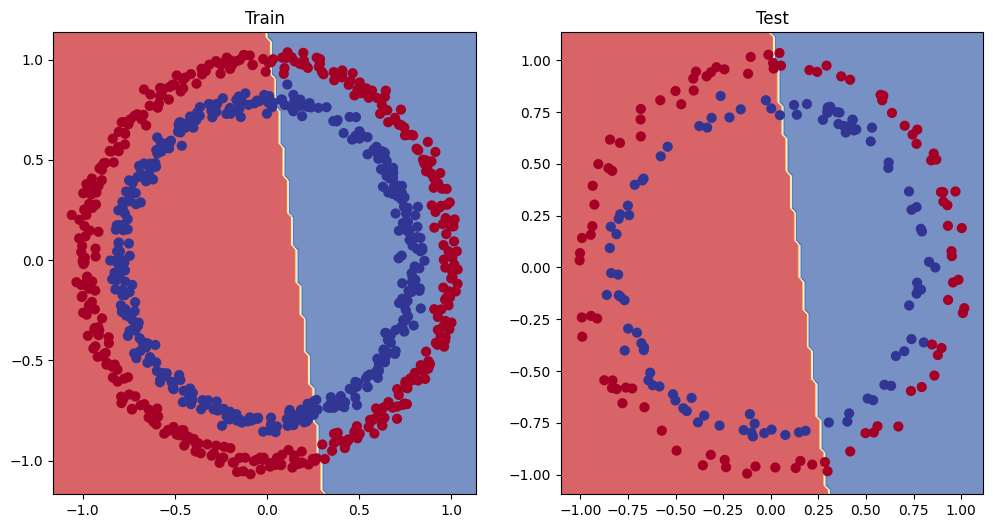

In [32]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model_0
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layer - gives the model more chances to learn about patterns in the data
* Increase the number of hidden units - (eg go from 5 hidden units to 10 hidden units)
* Fit for longer
* Change or add activation functions
* Change the learning rate
* Change the optimization function
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

See if the model can improve by:
* Adding more hidden units: from 5 to 10
* Increasing the number of layers: from 2 to 3
* Increasing the number of epochs; from 100 to 1000

Ideally it is recommended to make one change at a time and not make all the changes at once. This will help tell which change affected the model's behaviour.

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [35]:
# write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # -------------
  # Training
  # -------------
  model_1.train()

  # 1. Forward pass
  y_train_logits = model_1(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_logits))

  # 2. Calculate the loss and accuracy
  train_loss = loss_fn(y_train_logits, y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_train_pred)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # -------------
  # Testing
  # -------------

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_logits = model_1(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. Calculate loss and accuracy
    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=y_test_pred)

  # Print out whats happening
  if epoch % 100 == 0:
    print(
      f'Epoch: {epoch}  | '
      f'Train Loss: {train_loss:.5f}, Train Acc: {train_accuracy:.2f}%  | '
      f'Test Loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}%'
    )



Epoch: 0  | Train Loss: 0.69396, Train Acc: 50.88%  | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100  | Train Loss: 0.69305, Train Acc: 50.38%  | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200  | Train Loss: 0.69299, Train Acc: 51.12%  | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300  | Train Loss: 0.69298, Train Acc: 51.62%  | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400  | Train Loss: 0.69298, Train Acc: 51.12%  | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500  | Train Loss: 0.69298, Train Acc: 51.00%  | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600  | Train Loss: 0.69298, Train Acc: 51.00%  | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700  | Train Loss: 0.69298, Train Acc: 51.00%  | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800  | Train Loss: 0.69298, Train Acc: 51.00%  | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900  | Train Loss: 0.69298, Train Acc: 51.00%  | Test Loss: 0.69468, Test Acc: 46.00%


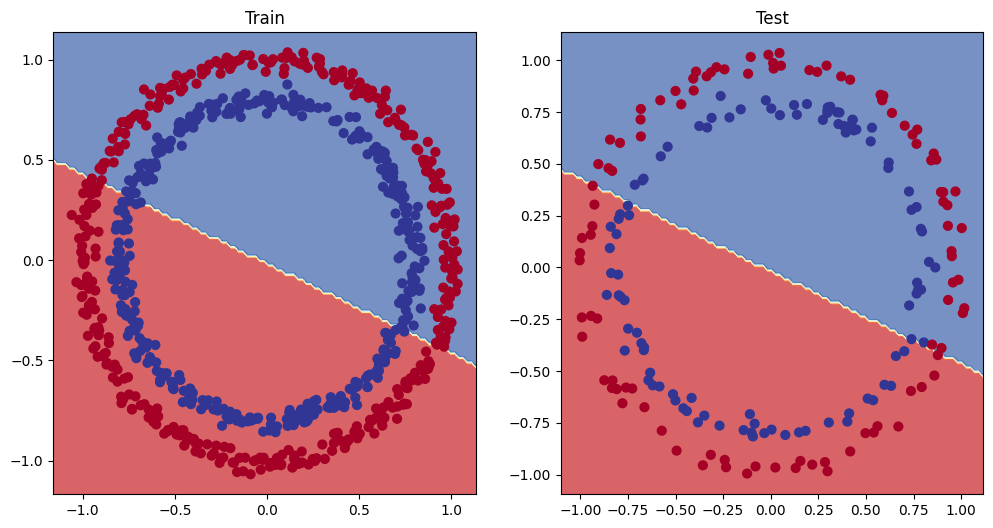

In [36]:
# Plot decision boundary of the model_0
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if model_1 can fit a straight line

A way to troubleshoot on a larger problem is to test out a smaller problem.

In [37]:
# Create straight line data set
weight = 0.7
bias = 0.3

X_regression = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)
y_regression = (weight * X_regression + bias)

print (len(X_regression))
X_regression[:3], y_regression[:3]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140]]))

In [38]:
# Create train and test splits
train_size = int(len(X_regression) * 0.8)
X_train_regression, X_test_regression = X_regression[:train_size], X_regression[train_size:]
y_train_regression, y_test_regression = y_regression[:train_size], y_regression[train_size:]

X_train_regression.shape, X_test_regression.shape, y_train_regression.shape, y_test_regression.shape

(torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

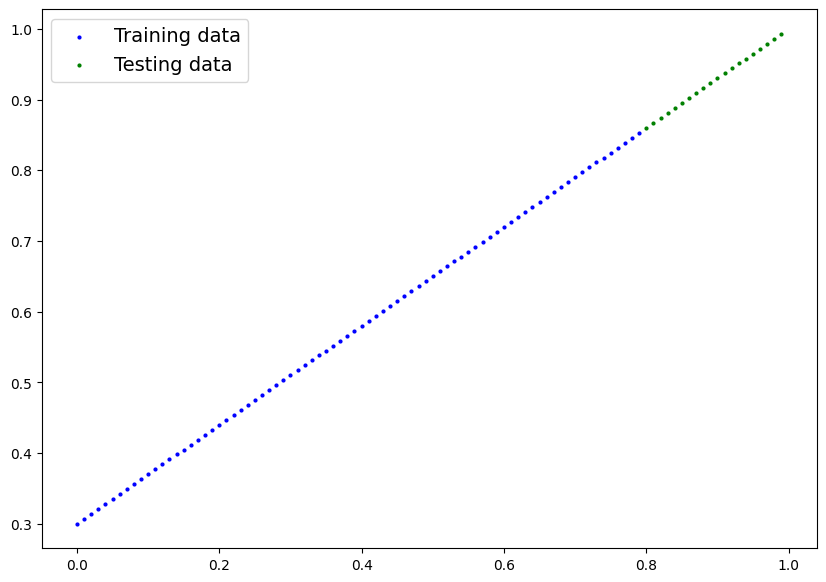

In [39]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [40]:
# Same architecture as model_1 (but for straight line datasets)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [42]:
# Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ## Training
  model_2.train()

  # 1. Forward pass
  y_preds = model_2(X_train_regression)

  # 2. Calculate the loss
  train_loss = loss_fn(y_preds, y_train_regression)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ## Testing
  model_2.eval()
  with torch.inference_mode():
    y_test_preds = model_2(X_test_regression)
    test_loss = loss_fn(y_test_preds, y_test_regression)

  ## Print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798 | Test loss: 0.00360


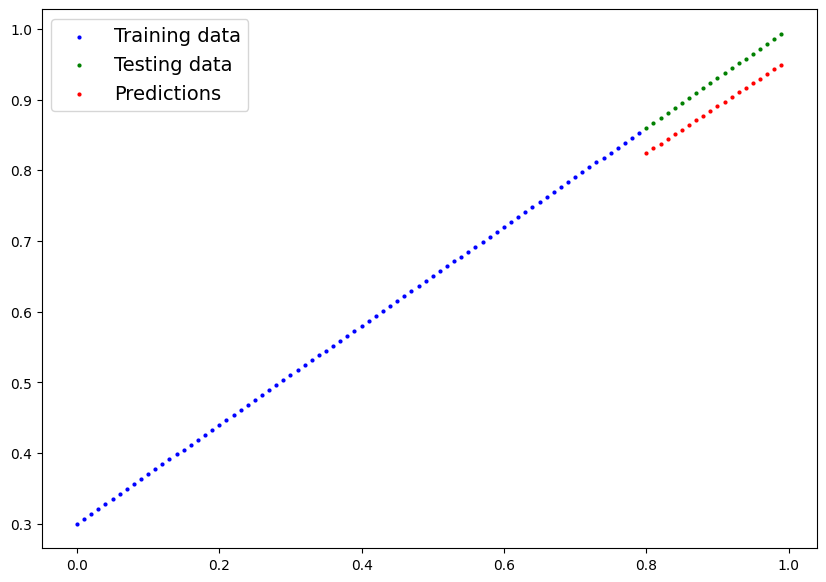

In [43]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference) with model_2
with torch.inference_mode():
  y_eval_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_eval_preds.cpu())

## 6. The missing piece: non-linearity

What patterns could the model draw if it was given enough amount of linear (straight line) and non-linear (non-straight lines) functions?

### 6.1 Recreating non-linear data (red and blue circles)

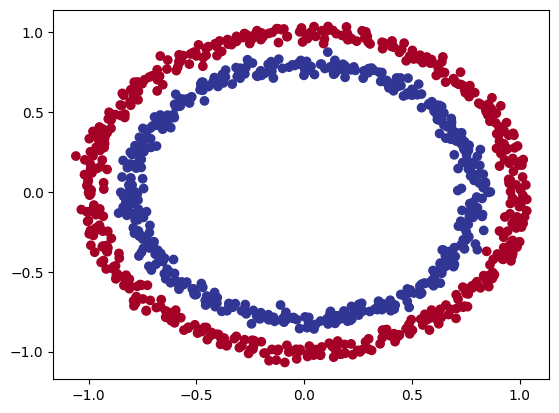

In [48]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, )

In [50]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### 6.2 Building a model with non-linearity
* Linear = straight lines
* Non-linear = non-straight lines

Artificial Neural Networks are a large comnination of linear (straight) and non-linear(non-straight) functions which are potentially able to find patterns in data.

In [104]:
# Build amodel with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)

model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [106]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [107]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all tensor data on target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Train Test loop
epochs = 1800

for epoch in range(epochs):
  ## Training
  model_3.train()

  # 1. Forward pass
  y_train_logits = model_3(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(y_train_logits))

  # 2. Calculate the train loss
  train_loss = loss_fn(y_train_logits, y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=train_preds)

  # 3. Zero gradients of optimizer
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ## Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(y_test_logits))
    # 2. Calculate the test loss
    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_preds)

  # Print out whats happening
  if epoch % 100 == 0:
    print(
        f'Epoch: {epoch} | '
        f'Train Loss: {train_loss:.5f}, Train Acc: {train_accuracy:.2f}% | '
        f'Test Loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}% | '
    )


Epoch: 0 | Train Loss: 0.69295, Train Acc: 50.00% | Test Loss: 0.69319, Test Acc: 50.00% | 
Epoch: 100 | Train Loss: 0.69115, Train Acc: 52.88% | Test Loss: 0.69102, Test Acc: 52.50% | 
Epoch: 200 | Train Loss: 0.68977, Train Acc: 53.37% | Test Loss: 0.68940, Test Acc: 55.00% | 
Epoch: 300 | Train Loss: 0.68795, Train Acc: 53.00% | Test Loss: 0.68723, Test Acc: 56.00% | 
Epoch: 400 | Train Loss: 0.68517, Train Acc: 52.75% | Test Loss: 0.68411, Test Acc: 56.50% | 
Epoch: 500 | Train Loss: 0.68102, Train Acc: 52.75% | Test Loss: 0.67941, Test Acc: 56.50% | 
Epoch: 600 | Train Loss: 0.67515, Train Acc: 54.50% | Test Loss: 0.67285, Test Acc: 56.00% | 
Epoch: 700 | Train Loss: 0.66659, Train Acc: 58.38% | Test Loss: 0.66322, Test Acc: 59.00% | 
Epoch: 800 | Train Loss: 0.65160, Train Acc: 64.00% | Test Loss: 0.64757, Test Acc: 67.50% | 
Epoch: 900 | Train Loss: 0.62362, Train Acc: 74.00% | Test Loss: 0.62145, Test Acc: 79.00% | 
Epoch: 1000 | Train Loss: 0.56818, Train Acc: 87.75% | Test Lo

### 6.4 Evaluating the model with non-linear activation functions

In [111]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:12], y_test[:12]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.], device='cuda:0'))

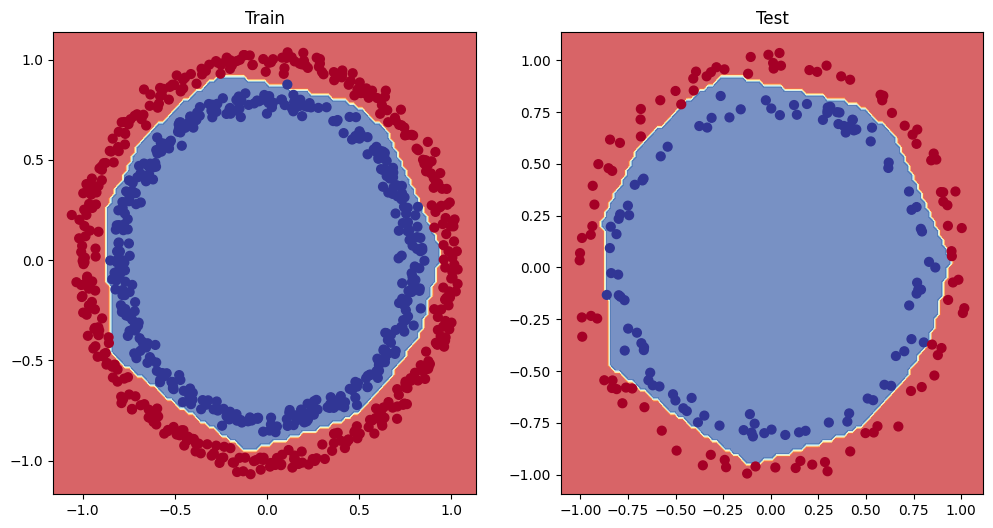

In [112]:
# Plot the descision boundary of model_3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)